# Load Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Understanding and Cleaning The Data

In [7]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [8]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [9]:
crime.shape

(852950, 27)

In [32]:
crime.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [33]:
# Checking for NULL values   

crime.isna().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [11]:
df = crime.drop(labels = ['modus_operandi', 'weapon_code', 'weapon_description',
                          'crime_code_2', 'crime_code_3', 'crime_code_4', 'cross_street'], axis = 1)
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [12]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,M,O,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,M,X,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,X,X,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,M,B,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,F,W,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,NaN,NaN,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,NaN,NaN,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,NaN,NaN,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973


In [36]:
df.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
status                  object
status_description      object
crime_code_1           float64
location                object
latitude               float64
longitude              float64
dtype: object

In [13]:
#Updating datatypes

df['date_reported'] = pd.to_datetime(df['date_reported'], format = '%Y-%m-%d')
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852950 entries, 0 to 852949
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   division_number      852950 non-null  int64         
 1   date_reported        852950 non-null  datetime64[ns]
 2   date_occurred        852950 non-null  datetime64[ns]
 3   area                 852950 non-null  int64         
 4   area_name            852950 non-null  object        
 5   reporting_district   852950 non-null  int64         
 6   part                 852950 non-null  int64         
 7   crime_code           852950 non-null  int64         
 8   crime_description    852950 non-null  object        
 9   victim_age           852950 non-null  int64         
 10  victim_sex           740344 non-null  object        
 11  victim_descent       740336 non-null  object        
 12  premise_code         852940 non-null  float64       
 13  premise_descri

In [15]:
df.describe(include = ['float64', 'int64'])

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,852939.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,500.486350,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,207.493864,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,110.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,331.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,442.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,626.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [40]:
df['victim_age'].value_counts()

victim_age
 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [16]:
df_age = df[df['victim_age'] > 0]

In [17]:
df_age['victim_age'].value_counts()

victim_age
30     19421
35     19008
31     18603
29     18552
28     18266
       ...  
95        89
96        88
98        67
97        63
120        1
Name: count, Length: 99, dtype: int64

In [18]:
df['year'] = df['date_occurred'].dt.year
df['month'] = df['date_occurred'].dt.month

In [44]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
39025,201004026,2020-01-01,2020-01-01 18:23:00,10,West Valley,1091,1,310,BURGLARY,44,...,504.0,OTHER RESIDENCE,IC,Invest Cont,310.0,3800 WINFORD DR,34.1386,-118.5525,2020,1
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,...,402.0,MARKET,AA,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684,2020,1
2389,200304056,2020-01-01,2020-01-01 14:37:00,3,Southwest,329,2,888,TRESPASSING,19,...,255.0,"AUTO DEALERSHIP (CHEVY, FORD, BMW, MERCEDES, E...",IC,Invest Cont,888.0,3300 S FIGUEROA ST,34.0225,-118.2796,2020,1
103594,201804032,2020-01-01,2020-01-01 12:50:00,18,Southeast,1823,1,210,ROBBERY,50,...,102.0,SIDEWALK,IC,Invest Cont,210.0,CENTURY,33.9456,-118.2652,2020,1
25891,200104434,2020-01-01,2020-01-01 02:50:00,1,Central,128,1,330,BURGLARY FROM VEHICLE,26,...,108.0,PARKING LOT,AO,Adult Other,330.0,300 E 2ND ST,34.0498,-118.2400,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770235,230125557,2023-12-04,2023-12-04 06:50:00,1,Central,111,1,330,BURGLARY FROM VEHICLE,0,...,717.0,HEALTH SPA/GYM,IC,Invest Cont,330.0,700 W CESAR E CHAVEZ AV,34.0606,-118.2439,2023,12
692345,231917421,2023-12-04,2023-12-03 09:45:00,19,Mission,1936,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,...,101.0,STREET,IC,Invest Cont,420.0,11400 AMBOY AV,34.2767,-118.4477,2023,12
835683,232117291,2023-12-04,2023-03-01 12:00:00,21,Topanga,2125,2,354,THEFT OF IDENTITY,0,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,354.0,21400 SATICOY ST,34.2119,-118.6017,2023,3
825607,231116467,2023-12-04,2023-12-01 22:30:00,11,Northeast,1141,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,0,...,101.0,STREET,IC,Invest Cont,331.0,N KENMORE AV,34.1018,-118.2973,2023,12


# Feature Understanding

<Axes: xlabel='month'>

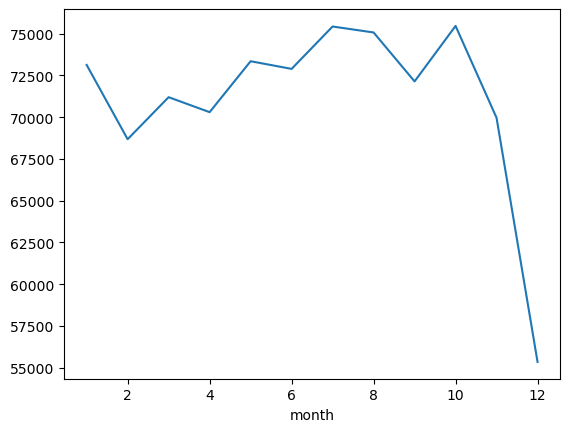

In [19]:
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

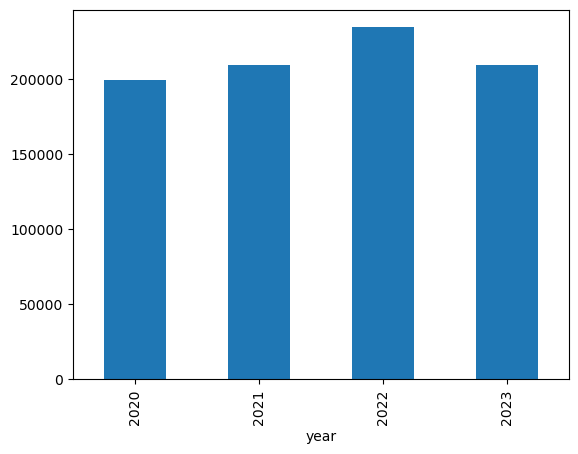

In [20]:
df['year'].value_counts().sort_index().plot(kind='bar')

In [22]:
df = df[~((df['month'] == 12) & (df['year'] == 2023))]

In [23]:
df.sort_values(by = 'date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


<Axes: xlabel='year,month'>

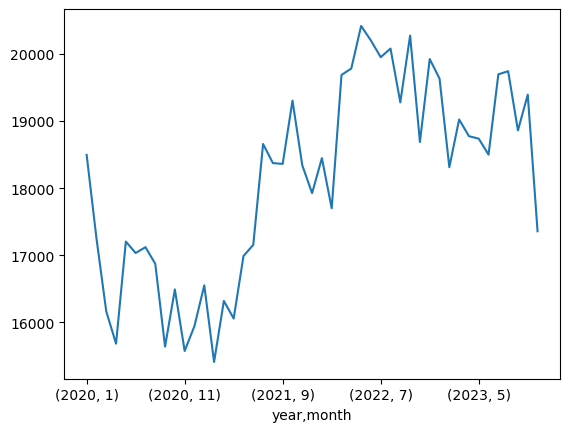

In [24]:
crime_over_time = df.groupby(['year', 'month']).size().plot()
crime_over_time

(array([3.96800e+03, 1.86630e+04, 9.81120e+04, 1.44858e+05, 1.22469e+05,
        8.64850e+04, 7.20760e+04, 4.59690e+04, 2.94150e+04, 1.28000e+04,
        4.50300e+03, 1.27400e+03, 4.41000e+02, 0.00000e+00, 1.00000e+00]),
 array([  2.        ,   9.86666667,  17.73333333,  25.6       ,
         33.46666667,  41.33333333,  49.2       ,  57.06666667,
         64.93333333,  72.8       ,  80.66666667,  88.53333333,
         96.4       , 104.26666667, 112.13333333, 120.        ]),
 <BarContainer object of 15 artists>)

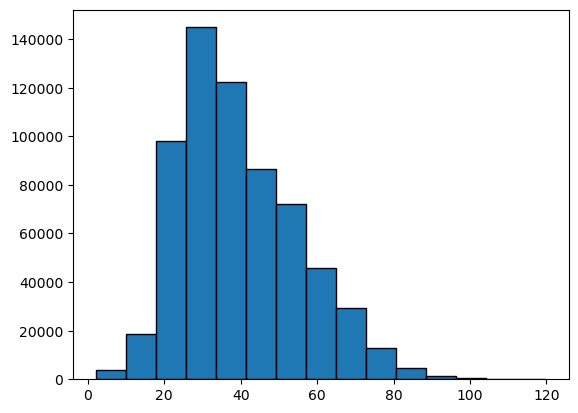

In [25]:
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)

In [26]:
df['date_occurred_no_time'] = df['date_occurred'].dt.date

In [27]:
crime_count_per_day = df.groupby(['date_occurred_no_time', 'crime_description']).size()

In [28]:
top_20_crimes = crime_count_per_day.groupby('crime_description').mean()\
                    .reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count', ascending = False).head(20)

In [29]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'average_daily_count', ascending = True)

<BarContainer object of 20 artists>

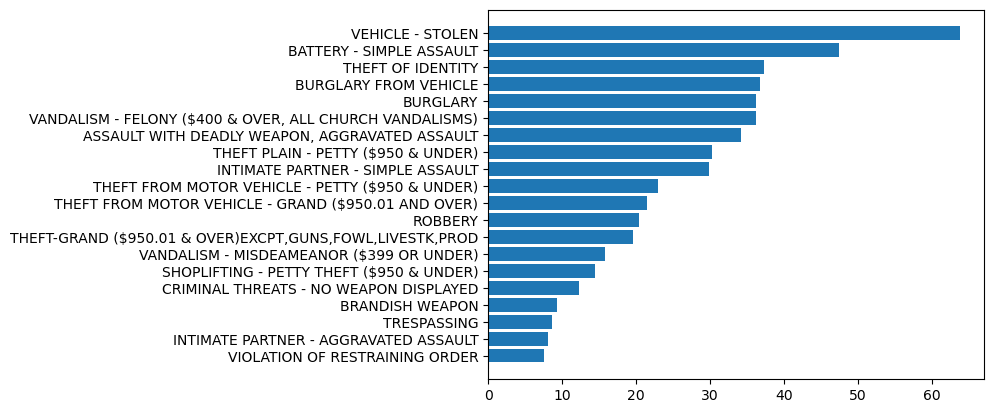

In [30]:
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'])

In [31]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [38]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Top 20 Crimes')

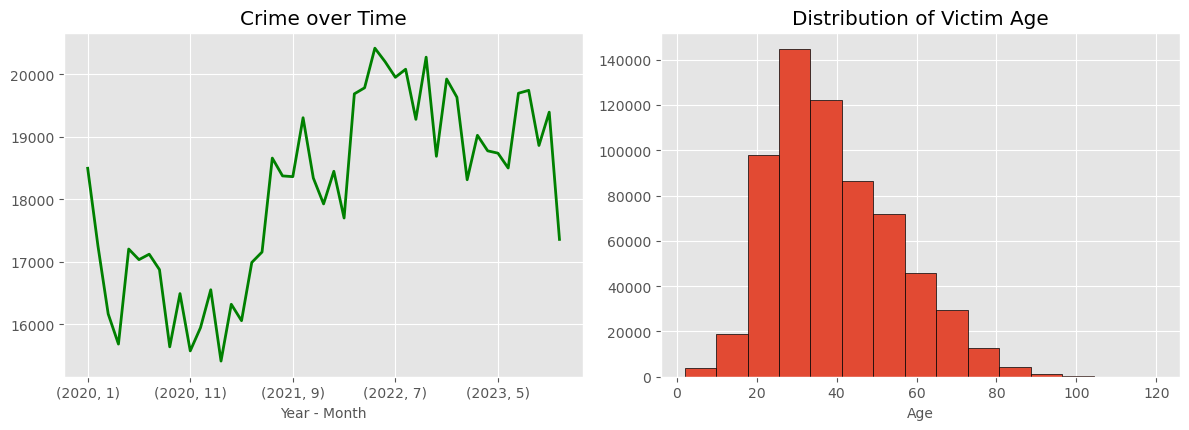

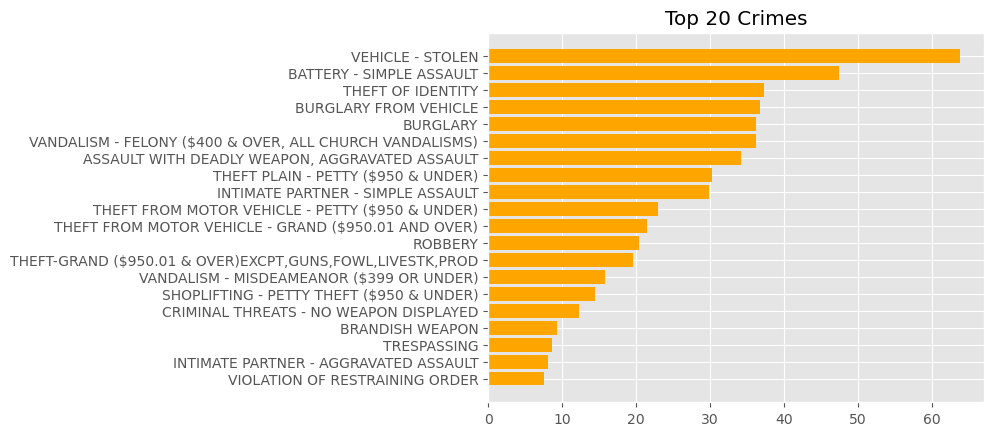

In [58]:
plt.figure(figsize = (12,8))

#Plot 1 - Line Chart
plt.subplot(2,2,1)
crime_plot = df.groupby(['year', 'month']).size().plot(color='green', linewidth=2)
crime_plot.set_xlabel('Year - Month', fontsize=10)
crime_plot.set_title('Crime over Time')

#Plot 2 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['victim_age'], edgecolor = 'black', bins = 15)
plt.tight_layout()
plt.xlabel('Age', fontsize = 10)
plt.title('Distribution of Victim Age')

# #Plot 3 - Horizontal Bar
plt.figure()
plt.barh(top_20_crimes_sorted['crime_description'], top_20_crimes_sorted['average_daily_count'], color = 'orange')
plt.title('Top 20 Crimes')

In [33]:
 # Show the difference in reported and occured - How long it takes to report?
    
df['Time to report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred_no_time'])).dt.days

In [34]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_occurred_no_time,Time to report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0


In [35]:
df['Time to report'].value_counts().head(10)

Time to report
0    419620
1    185029
2     52808
3     30894
4     19932
5     14416
6     10837
7      9722
8      7053
9      5660
Name: count, dtype: int64

In [36]:
df.groupby(['crime_description'])['Time to report'].mean().sort_values().head(10)

crime_description
FAILURE TO DISPERSE                                         0.000000
DISRUPT SCHOOL                                              0.083333
PURSE SNATCHING - ATTEMPT                                   0.083333
PETTY THEFT - AUTO REPAIR                                   0.125000
LYNCHING                                                    0.157895
FIREARMS RESTRAINING ORDER (FIREARMS RO)                    0.250000
BOMB SCARE                                                  0.345960
BATTERY POLICE (SIMPLE)                                     0.371023
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)          0.400000
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)    0.500000
Name: Time to report, dtype: float64

In [91]:
# Identifying the top 3 crimes with the highest average victim age

df_age.groupby('crime_description')['victim_age'].mean().reset_index().sort_values(by = 'victim_age', ascending = False).head(3)

,crime_description,victim_age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667
77,LYNCHING,53.000000


In [101]:
# Finding the area with the highest number of crimes occurring during nighttime

nighttime_crimes = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour <= 3)]

In [105]:
nighttime_crimes['area_name'].value_counts()

area_name
Central        18873
77th Street    17568
Hollywood      15741
Pacific        15328
Southwest      14819
Southeast      14638
Olympic        14256
Newton         13843
N Hollywood    13428
Rampart        13047
Wilshire       11665
Harbor         11623
Northeast      11379
West Valley    11351
West LA        11012
Van Nuys       10964
Mission        10813
Hollenbeck     10425
Devonshire     10172
Topanga        10104
Foothill        8745
Name: count, dtype: int64

In [126]:
hourly_crime = df['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

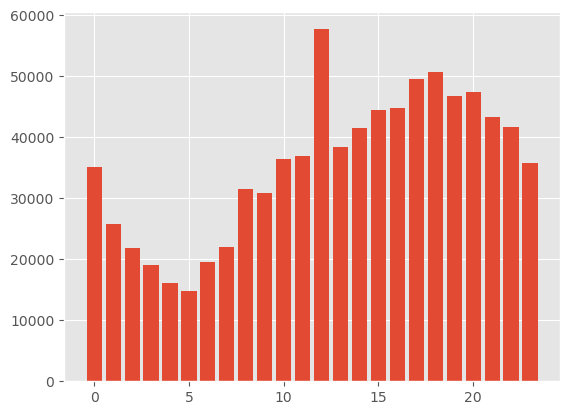

In [114]:
plt.bar(hourly_crime['date_occurred'], hourly_crime['count'])

In [116]:
df[df['date_occurred'].dt.hour == 12]['crime_description'].value_counts()

crime_description
THEFT OF IDENTITY                               9098
VEHICLE - STOLEN                                4048
BATTERY - SIMPLE ASSAULT                        3958
THEFT PLAIN - PETTY ($950 & UNDER)              3785
BURGLARY                                        2945
                                                ... 
DRUGS, TO A MINOR                                  1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)       1
BIGAMY                                             1
GRAND THEFT / INSURANCE FRAUD                      1
INCITING A RIOT                                    1
Name: count, Length: 124, dtype: int64

In [128]:
no_identity_theft = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]

In [132]:
new_hourly_count = no_identity_theft['date_occurred'].dt.hour.value_counts().sort_index().reset_index()

<BarContainer object of 24 artists>

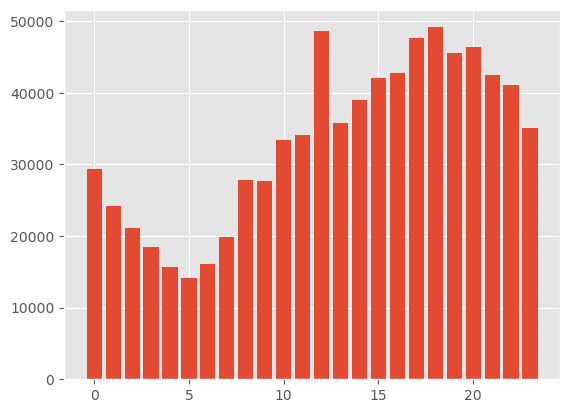

In [133]:
plt.bar(new_hourly_count['date_occurred'], new_hourly_count['count'])

In [138]:
no_identity_theft[no_identity_theft['date_occurred'].dt.hour == 12]['crime_description'].value_counts()

crime_description
VEHICLE - STOLEN                                           4048
BATTERY - SIMPLE ASSAULT                                   3958
THEFT PLAIN - PETTY ($950 & UNDER)                         3785
BURGLARY                                                   2945
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2587
                                                           ... 
DRUGS, TO A MINOR                                             1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)                  1
BIGAMY                                                        1
GRAND THEFT / INSURANCE FRAUD                                 1
INCITING A RIOT                                               1
Name: count, Length: 123, dtype: int64